In [2]:
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from matplotlib import pyplot as plt

%pylab inline

from grasp import *

Populating the interactive namespace from numpy and matplotlib


# Get Phenotype List

In [3]:
phenos = q.intersecting_phenos('primary', pop_flags=['eur','afr'],
                               exclusive=True, list_only=True)
phenos

['Asthma',
 'Fasting glucose',
 'Breast cancer',
 'Uric acid levels, in serum',
 'Type II Diabetes Mellitus',
 'Systemic lupus erythematosus',
 'Body mass index (BMI)',
 'Prostate cancer',
 'Platelet count (PLT) and platelet volume (MPV)',
 "Alzheimer's disease",
 'Chronic kidney disease (CKD)',
 'Blood cell traits, in red blood cells',
 'Nephropathy (diabetic nephropathy)',
 'ECG (Electrocardiogram measurements), QT interval',
 "Alzheimer's disease, late onset",
 'Nicotine, smoking behavior',
 'Sarcoidosis',
 'LDL cholesterol',
 'Alcohol dependence',
 'ECG (Electrocardiogram measurements), PR interval',
 'Urate (in serum), gout',
 'Height',
 'Age at menarche',
 'Blood cell counts and traits, in red blood cells',
 'Carboplatin cytotoxicity and gene expression, in blood cell lines',
 'Blood pressure and/or hypertension',
 'Gene expression in leukocytes',
 'Bilirubin levels, in serum',
 'HIV-1 viral load at set point',
 'Blood pressure',
 'Coronary heart disease (incident CHD)']

# Body mass index (BMI)

In [4]:
eur_bmi = get_studies(only_disc_pop='eur', primary_phenotype='Body mass index (BMI)', dictionary=True)
afr_bmi = get_studies(only_disc_pop='afr', primary_phenotype='Body mass index (BMI)', dictionary=True)
print("# of studies: EUR: {}, AFR: {}".format(len(eur_bmi), len(afr_bmi)))

# of studies: EUR: 9, AFR: 2


In [5]:
eur_bmi

{'A common genetic variant is associated with adult and childhood obesity.': 16614226,
 'A novel locus for body mass index on 5p15.2: a meta-analysis of two genome-wide association studies.': 22446040,
 'Association analyses of 249,796 individuals reveal 18 new loci associated with body mass index.': 20935630,
 'Association of FTO variants with BMI and fat mass in the self-contained population of Sorbs in Germany.': 19584900,
 'Common variants near MC4R are associated with fat mass, weight and risk of obesity.': 18454148,
 'Gene-centric meta-analyses of 108 912 individuals confirm known body mass index loci and reveal three novel signals.': 23001569,
 'Genome-Wide Population-Based Association Study of Extremely Overweight Young Adults - The GOYA Study.': 21935397,
 'Genome-wide association scans identified CTNNBL1 as a novel gene for obesity.': 18325910,
 'Six new loci associated with body mass index highlight a neuronal influence on body weight regulation.': 19079261}

Meta-analyses may include the same studies, so let's skip that one for now.

In [6]:
eur_bmi.pop('A novel locus for body mass index on 5p15.2: a meta-analysis of two genome-wide association studies.')

22446040

In [7]:
q.write_study_dict(eur_bmi, 'eur_bmi_studies.txt')

In [8]:
eur_bmi = q.lookup_studies(eur_bmi)

In [9]:
afr_bmi

{'A meta-analysis identifies new loci associated with body mass index in individuals of African ancestry.': 23583978,
 'Genome-Wide Association of BMI in African Americans.': 21701570}

In [10]:
q.write_study_dict(afr_bmi, 'afr_bmi_studies.txt')

In [11]:
afr_bmi = q.lookup_studies(afr_bmi)

All of the studies look good, so now lets pull the SNPs from the database.

In [12]:
eur_bmi_snps = get_snps(eur_bmi)
afr_bmi_snps = get_snps(afr_bmi)
print("Total SNPs:         ", len(eur_bmi_snps), len(afr_bmi_snps))
eur_bmi_snps_collapsed = q.collapse_dataframe(eur_bmi_snps)
afr_bmi_snps_collapsed = q.collapse_dataframe(afr_bmi_snps)
eur_bmi_snps_filtered  = q.collapse_dataframe(eur_bmi_snps, pvalue_filter=5e-8)
afr_bmi_snps_filtered  = q.collapse_dataframe(afr_bmi_snps, pvalue_filter=5e-8)
print("Collapsed dataframe:", len(eur_bmi_snps_collapsed), len(afr_bmi_snps_collapsed))
print("Filterd by pvalue:  ", len(eur_bmi_snps_filtered), len(afr_bmi_snps_filtered))

Total SNPs:          163336 377
Collapsed dataframe: 155781 268
Filterd by pvalue:   501 15


Let's take a look at the pvalue info

In [13]:
eur_bmi_snps_collapsed.pval.describe()

count     1.557810e+05
mean      2.142772e-02
std       1.545343e-02
min      1.770000e-109
25%       7.060000e-03
50%       2.000000e-02
75%       3.480000e-02
max       5.000000e-02
Name: pval, dtype: float64

In [14]:
afr_bmi_snps_collapsed.pval.describe()

count    2.680000e+02
mean     5.414924e-04
std      1.592477e-03
min      5.100000e-14
25%      2.282500e-05
50%      9.390000e-05
75%      2.277250e-04
max      2.000000e-02
Name: pval, dtype: float64

Now let's get the intersection of the two.

In [15]:
eur_afr_bmi = q.intersect_overlapping_series(eur_bmi_snps_collapsed,
                                             afr_bmi_snps_collapsed,
                                             names=['eur', 'afr'], stats=True)

Series 1 len: 155781
Series 2 len: 268
Intersected df len: 147


It is easier to work with the minus log of the pvalues, so let's use numpy to do that.

In [16]:
ea_bmi_minus_log = -np.log10(eur_afr_bmi)
ea_bmi_minus_log

,eur,afr
10:129247480,2.262807,2.795880
11:27725986,4.838632,4.037631
12:42304789,2.072117,2.920819
12:50247468,6.337242,5.359519
14:79936964,3.721246,4.454693
14:79942647,6.570248,4.218245
14:79969194,3.581699,3.662142
15:68086838,5.015331,3.356547
16:53800954,23.585027,4.056505
16:53803574,14.074688,6.570248


## Plot

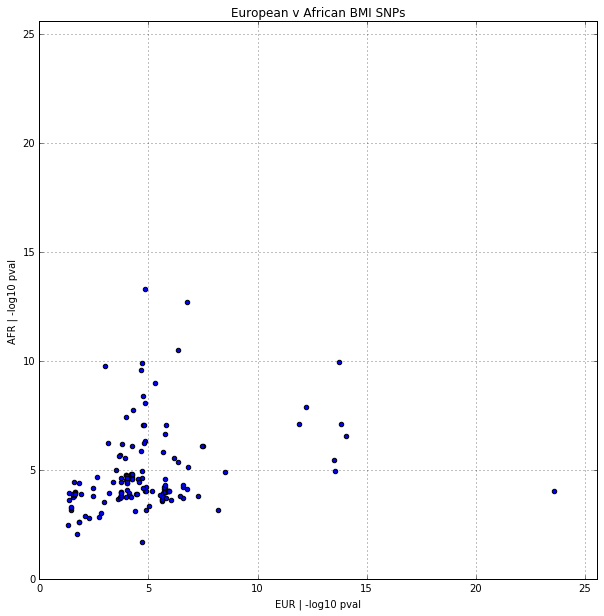

In [19]:
df = ea_bmi_minus_log
title = 'European v African BMI SNPs'
xlabel = 'EUR | -log10 pval'
ylabel = 'AFR | -log10 pval'

lmax = df.max().max() + 2

# Matplotlib
f, a = plt.subplots(figsize=(10,10))
df.plot(x='eur', y='afr', ax=a, kind='scatter')
a.set_title(title)
a.set_xlabel(xlabel)
a.set_ylabel(ylabel)
a.set_xlim(0, lmax)
a.set_ylim(0, lmax)
f.savefig('eur_afr_bmi_snps.pdf')
plt.grid()
plt.show()

In [18]:
# Plotly
data = go.Data([go.Scatter(
            x=df.eur,
            y=df.afr,
            mode='markers',
            text=df.index
        )])
layout = go.Layout(
    title = title,
    hovermode = 'closest',
    autosize = False,
    height = 800,
    width = 800,
    xaxis = dict(
        title = xlabel,
        range = [0, lmax],
        ticklen = 5,
        zeroline = True,
        gridwidth = 2,
    ),
    yaxis = dict(
        title = ylabel,
        range = [0, lmax],
        ticklen = 5,
        zeroline = True,
        gridwidth = 2,
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='eur_v_afr_bmi', sharing='public')